#Getting Started

**In this section, we will import files and have a brief look at the data**

In [51]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#import the data from drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
cd /content/drive/My Drive/Colab Notebooks/data science/Data_Analysis #the path to reach the data

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/data science/Data_Analysis #the path to reach the data'
/content/drive/My Drive/Colab Notebooks/data science/Data_Analysis


In [54]:
data = pd.read_csv('KAG_conversion_data.csv') #open the csv file

**The description of variables**

1. ad_id: an unique ID for each ad.

2. xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3. fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4. age: age of the person to whom the ad is shown.

5. gender: gender of the person to whim the add is shown

6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7. Impressions: the number of times the ad was shown.

8. Clicks: number of clicks on for that ad.

9. Spent: Amount paid by company xyz to Facebook, to show that ad.

10. Total conversion: Total number of people who enquired about the product after seeing the ad.

11. Approved conversion: Total number of people who bought the product after seeing the ad.



In [55]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [56]:
data.shape

(1143, 11)

The data has 1143 rows and 11 columns

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


the type of each variable is looking good

#Cleaning the data

**In this section, we will check the quality of the data and clean it where needed**

In [58]:
#checking the null data in the dataset
null_data = data.isnull().sum()
null_data

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

We don't have any null data, so we don't need to drop null data

In [59]:
data = data.drop_duplicates() #drop any duplicate entries

#Data Analysis

##Statistical Analysis

**We will take a look at some basic statistic and correlation of the variables**

In [60]:
#get a sense of the statistic
#we can see the count, mean, std, and quantile of each variable
#only pay attention to Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion columns
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Some key information from the table above:
  1. The average spent on an ad is 51 dollar but 50% of the ads are below 12 dollar
  2. 3/4 of an ad can only generate 1 sale
  3. One ad has a median of 8 clicks
  4. Most variables have large standard deviation and median is lower than mean






---



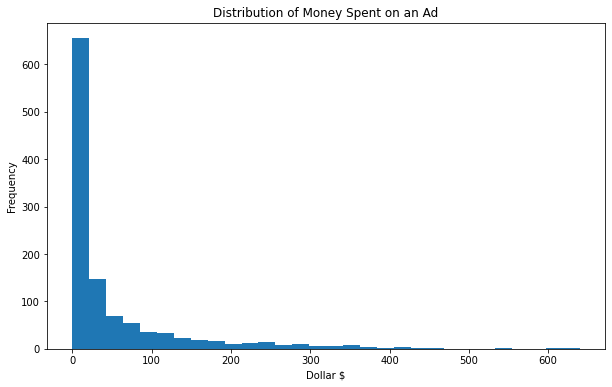

In [61]:
#look at the distribution of money spent
fig = plt.subplots(figsize = (10, 6))
plt.hist(data['Spent'], bins=30)
plt.title('Distribution of Money Spent on an Ad')
plt.ylabel('Frequency')
plt.xlabel('Dollar $')
plt.show()

We can see that the distribution skews right with the median is lower than the mean



---



In [62]:
#checking to see how many campaigns are there in the dataset
data['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

There are 3 campaigns in the dataset

In [63]:
#checking the age groups
data['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

There are 4 age ranges



---



In [64]:
#replace the number code of campaigns into names
data["xyz_campaign_id"].replace({916:"campaign_1",936:"campaign_2",1178:"campaign_3"}, inplace=True)

In [65]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_1,103928,30-34,M,28,4133,1,1.29,1,1




---



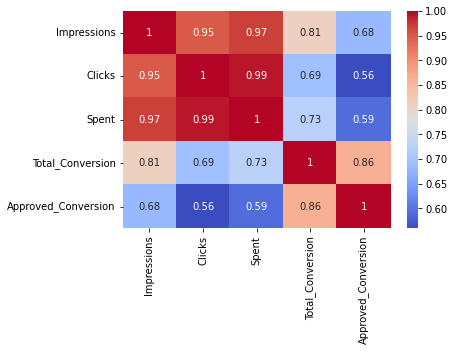

In [66]:
#create heatmap to see correlation of variables: Impressions, Clicks, Spent, Total_Conversion, and Approved_Conversion
sns.heatmap(data[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True, cmap='coolwarm')

we can see that Clicks and spent and impression have strong correlation. All 5 variables have correlation above 0.5.

##Visualization

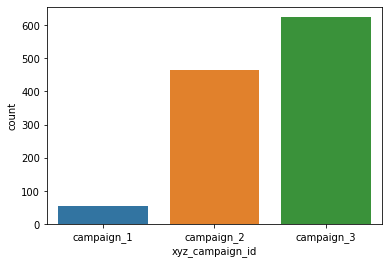

In [67]:
#count how many ads each campaign has
sns.countplot(x ='xyz_campaign_id', data = data) 
plt.show()

For the analysis, it is reasonable to group the ads into campaigns and compare the performance of them.






###Data by Campaign

In [68]:
#group data by campaigns
data_by_campaign = data.groupby(['xyz_campaign_id'], as_index=False).sum()
data_by_campaign.drop(['ad_id', 'fb_campaign_id', 'interest'], axis=1) #drop columns that we are not interested in

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,campaign_1,482925,113,149.710001,58,24
1,campaign_2,8128187,1984,2893.369999,537,183
2,campaign_3,204823716,36068,55662.149959,2669,872


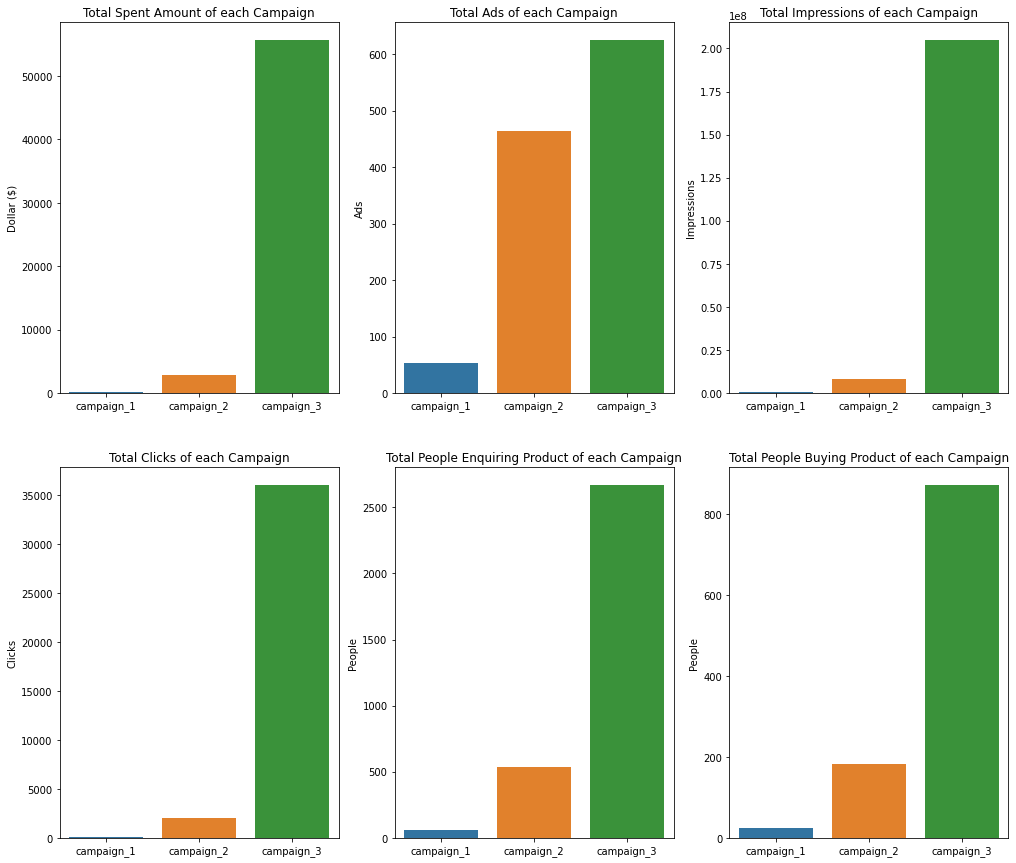

In [69]:
fig, ax = plt.subplots(2, 3, figsize = (17,15)) #create 6 graphs in 1 figure

sns.barplot(ax=ax[0, 0], x = data_by_campaign['xyz_campaign_id'], y = data_by_campaign['Spent'])
ax[0,0].set_title('Total Spent Amount of each Campaign')
ax[0,0].set_ylabel('Dollar ($)')
ax[0,0].set(xlabel = None)

sns.countplot(ax=ax[0,1], x =data['xyz_campaign_id'])
ax[0,1].set_title('Total Ads of each Campaign')
ax[0,1].set_ylabel('Ads')
ax[0,1].set(xlabel = None)

sns.barplot(ax = ax[0,2], x = data_by_campaign['xyz_campaign_id'], y =data_by_campaign['Impressions'])
ax[0,2].set_title('Total Impressions of each Campaign')
ax[0,2].set_ylabel('Impressions')
ax[0,2].set(xlabel = None)

sns.barplot(ax=ax[1,0], x =data_by_campaign['xyz_campaign_id'], y =data_by_campaign['Clicks'])
ax[1,0].set_title('Total Clicks of each Campaign')
ax[1,0].set_ylabel('Clicks')
ax[1,0].set(xlabel = None)

sns.barplot(ax=ax[1,1], x= data_by_campaign['xyz_campaign_id'], y= data_by_campaign['Total_Conversion'])
ax[1,1].set_title('Total People Enquiring Product of each Campaign')
ax[1,1].set_ylabel('People')
ax[1,1].set(xlabel = None)

sns.barplot(ax=ax[1,2], x= data_by_campaign['xyz_campaign_id'], y =data_by_campaign['Approved_Conversion'])
ax[1,2].set_title('Total People Buying Product of each Campaign')
ax[1,2].set_ylabel('People')
ax[1,2].set(xlabel = None)

plt.show()

We can clearly see that Campaign 3 stands out. It was spent the most money on and generate the most sales, and of course performed well in other variables.

###Data by Age

In [70]:
#group the data by campaign and by age
data_by_age = data.groupby(['xyz_campaign_id', 'age'], as_index=False).sum()
data_by_age

,xyz_campaign_id,age,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,campaign_1,30-34,20578321,3017685,713,257672,57,75.330000,31,11
1,campaign_1,35-39,8517131,1249023,217,81076,17,23.640000,13,6
2,campaign_1,40-44,4260554,624844,94,61977,14,16.810000,7,4
3,campaign_1,45-49,4977971,730205,163,82200,25,33.930000,7,3
4,campaign_2,30-34,157983271,22720666,5052,1655949,286,391.440000,227,88
5,campaign_2,35-39,71169071,10255156,2347,1111675,275,383.430001,96,34
6,campaign_2,40-44,58982302,8608761,1692,1203597,311,450.400000,83,25
7,campaign_2,45-49,82630696,11961153,2531,4156966,1112,1668.099997,131,36
8,campaign_3,30-34,229655659,29840616,7365,66079398,9140,14785.629986,1173,395
9,campaign_3,35-39,169305174,22070852,5836,40911893,6802,10705.359993,517,167


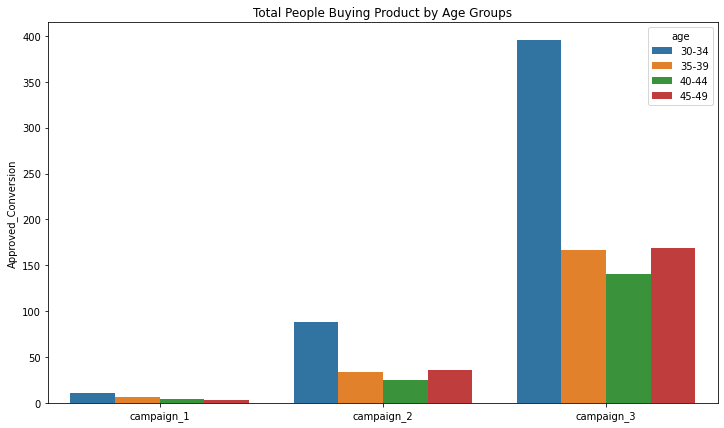

In [71]:
fig = plt.subplots(figsize = (12,7))
g = sns.barplot(x=data_by_age["xyz_campaign_id"], y=data_by_age["Approved_Conversion"], hue=data_by_age["age"]) #plot the data by age groups
g.set(xlabel = None)
g.set_title('Total People Buying Product by Age Groups')

plt.show()

We can see that in all campaigns, people in 30-34 group show the most interest compare to other age groups.

###Data by Gender

In [72]:
data_by_gender = data.groupby(['xyz_campaign_id', 'gender'], as_index=False).sum() #group data by gender
data_by_gender

,xyz_campaign_id,gender,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,campaign_1,F,13509671,1981658,501,197081,52,69.850000,20,8
1,campaign_1,M,24824306,3640099,686,285844,61,79.860001,38,16
2,campaign_2,F,204333803,29519659,6533,6290206,1633,2380.359999,302,96
3,campaign_2,M,166431537,24026077,5089,1837981,351,513.010000,235,87
4,campaign_3,F,319678160,41768506,11747,108375560,22193,32052.409965,1322,391
5,campaign_3,M,399661995,51979101,12896,96448156,13875,23609.739994,1347,481


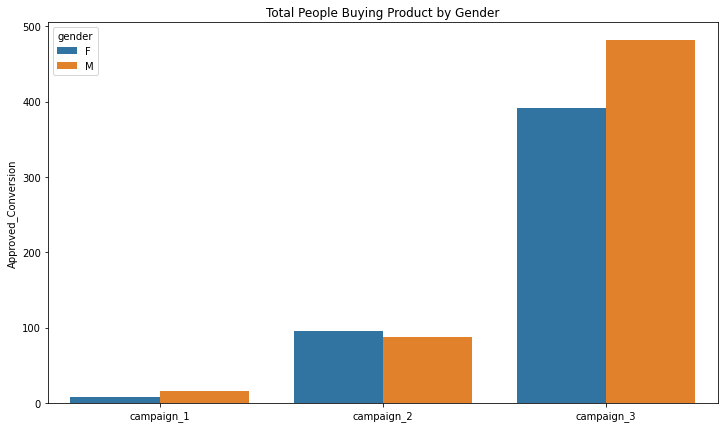

In [73]:
fig = plt.subplots(figsize = (12,7))
g = sns.barplot(x=data_by_gender["xyz_campaign_id"], y=data_by_gender["Approved_Conversion"], hue=data_by_gender["gender"])
g.set(xlabel = None)
g.set_title('Total People Buying Product by Gender')

plt.show()

Both male and female are interested in the product

##Calculation

**In this section, we will calculate some ratio based on the datasets**

In [89]:
#create new columns

#conversion rate = total enquires (total conversion) / total interactions (clicks)
data_by_campaign['Conversion_Rate'] = data_by_campaign['Total_Conversion']/data_by_campaign['Clicks']*100

#customer acquisition rate = sales (approved conversion) / money spent (spent)
data_by_campaign['Customer_Acquisition_Cost'] = data_by_campaign['Spent']/data_by_campaign['Approved_Conversion']


data_by_campaign[['xyz_campaign_id','Conversion_Rate', 'Customer_Acquisition_Cost']] #keep only interested columns

,xyz_campaign_id,Conversion_Rate,Customer_Acquisition_Cost
0,campaign_1,51.327434,6.237917
1,campaign_2,27.066532,15.810765
2,campaign_3,7.399911,63.832741


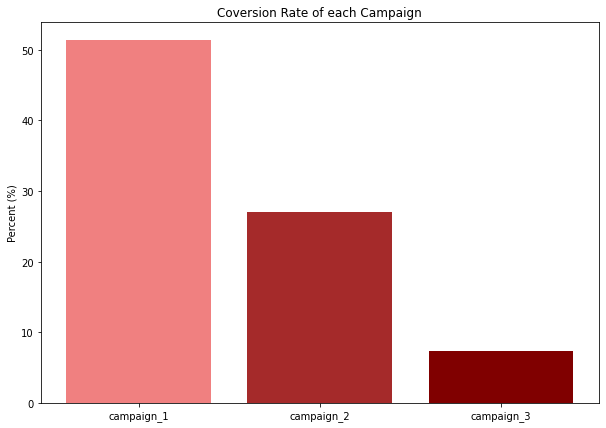

In [92]:
fig = plt.subplots(figsize =(10, 7))

plt.bar(data_by_campaign['xyz_campaign_id'], data_by_campaign['Conversion_Rate'] , color = ['lightcoral', 'brown', 'maroon' ]) #plot the conversion rate

plt.title('Coversion Rate of each Campaign')
plt.ylabel('Percent (%)')
plt.show()

Based on the graphs on the section above, we might think that campaign 3 was doing the best. However, the conversion rate suggests that campaign 1 was actually generating more enquiries per click than three of the campaigns.



---



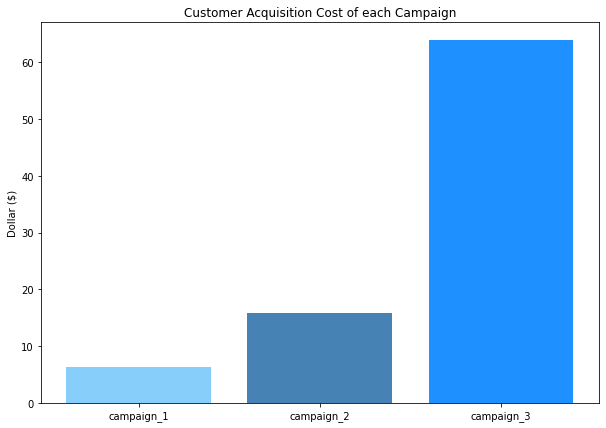

In [94]:
fig = plt.subplots(figsize =(10, 7))

plt.bar(data_by_campaign['xyz_campaign_id'], data_by_campaign['Customer_Acquisition_Cost'] 
        , color = ['lightskyblue', 'steelblue', 'dodgerblue' ]) #plot the Customer Acquisition Cost

plt.title('Customer Acquisition Cost of each Campaign')
plt.ylabel('Dollar ($)')
plt.show()

It takes campaign 1 below 10 dollar to acquire a new customer whereas it takes over 60 dollar for campaign 3 to do so. Over 6 times.

**These information means that even though campaign 3 has more interection from people, it might not touch the target customers who actually want to buy the products. Also, it is way more expensive to acquire new customers in campaign 3. However, it is hard to make any conclusion about which campaign is the best. It could be that the content of the ads in campaign 1 is good but it has less ads so there is low approved conversion but high conversion rate. Or it can be that campaign 3 is a big budget campaign and the goal is to acquire as many customers as possible.**

**Only when we know the purpose of the campaigns, can we examine how successful a campaign is.**  